In [21]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('housepricedata.csv')
dataset = df.values

# split the dataset
X = dataset[:,0:10]
Y = dataset[:,10]

In [10]:
# Change dataset so values are from 0 to 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
# split the dataset into training and test sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [19]:
# Create model with layers
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# configure model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# training 
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 22ms/step - loss: 0.6902 - accuracy: 0.5480 - val_loss: 0.6778 - val_accuracy: 0.7032
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.7169 - val_loss: 0.6697 - val_accuracy: 0.6941
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.6725 - val_loss: 0.6634 - val_accuracy: 0.6119
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.6353 - val_loss: 0.6572 - val_accuracy: 0.5936
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6207 - val_loss: 0.6507 - val_accuracy: 0.6027
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6385 - accuracy: 0.6485 - val_loss: 0.6435 - val_accuracy: 0.6393
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6371 - accuracy: 0.6662 - val_loss: 0.6370 - val_accuracy: 0.6575
Epoch 8/100


In [20]:
# determine the accuracy 
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8950


0.8949771523475647

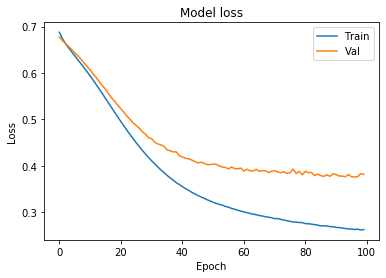

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [25]:
# Making a better model
from keras.layers import Dropout
from keras import regularizers

In [28]:
model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 71ms/step - loss: 21.0739 - accuracy: 0.5092 - val_loss: 3.9072 - val_accuracy: 0.7900
Epoch 2/100
32/32 [==============================] - 2s 56ms/step - loss: 2.4790 - accuracy: 0.8163 - val_loss: 0.6907 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 2s 61ms/step - loss: 0.5787 - accuracy: 0.8761 - val_loss: 0.5424 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 2s 56ms/step - loss: 0.5029 - accuracy: 0.8707 - val_loss: 0.5293 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 2s 59ms/step - loss: 0.4743 - accuracy: 0.8821 - val_loss: 0.5294 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 2s 58ms/step - loss: 0.5025 - accuracy: 0.8721 - val_loss: 0.5209 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 2s 56ms/step - loss: 0.4631 - accuracy: 0.8830 - val_loss: 0.5076 - val_accuracy: 0.8676
Epoch

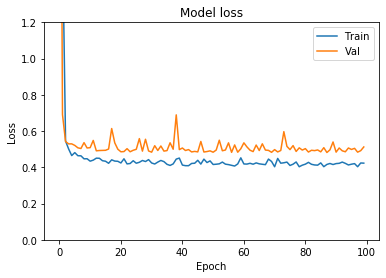

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()